In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
data = {
    'age': np.random.randint(18, 70, 1000),
    'income': np.random.randint(20000, 100000, 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'loan_approved': np.random.choice(['Yes', 'No'], 1000)
}

In [3]:
df = pd.DataFrame(data)

In [4]:
le = LabelEncoder()
df['loan_approved'] = le.fit_transform(df['loan_approved'])

X = df[['age', 'income', 'credit_score']]
y = df['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
y_pred = dt_classifier.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.47

Confusion Matrix:
[[49 61]
 [46 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       110
           1       0.42      0.49      0.45        90

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.47      0.47       200



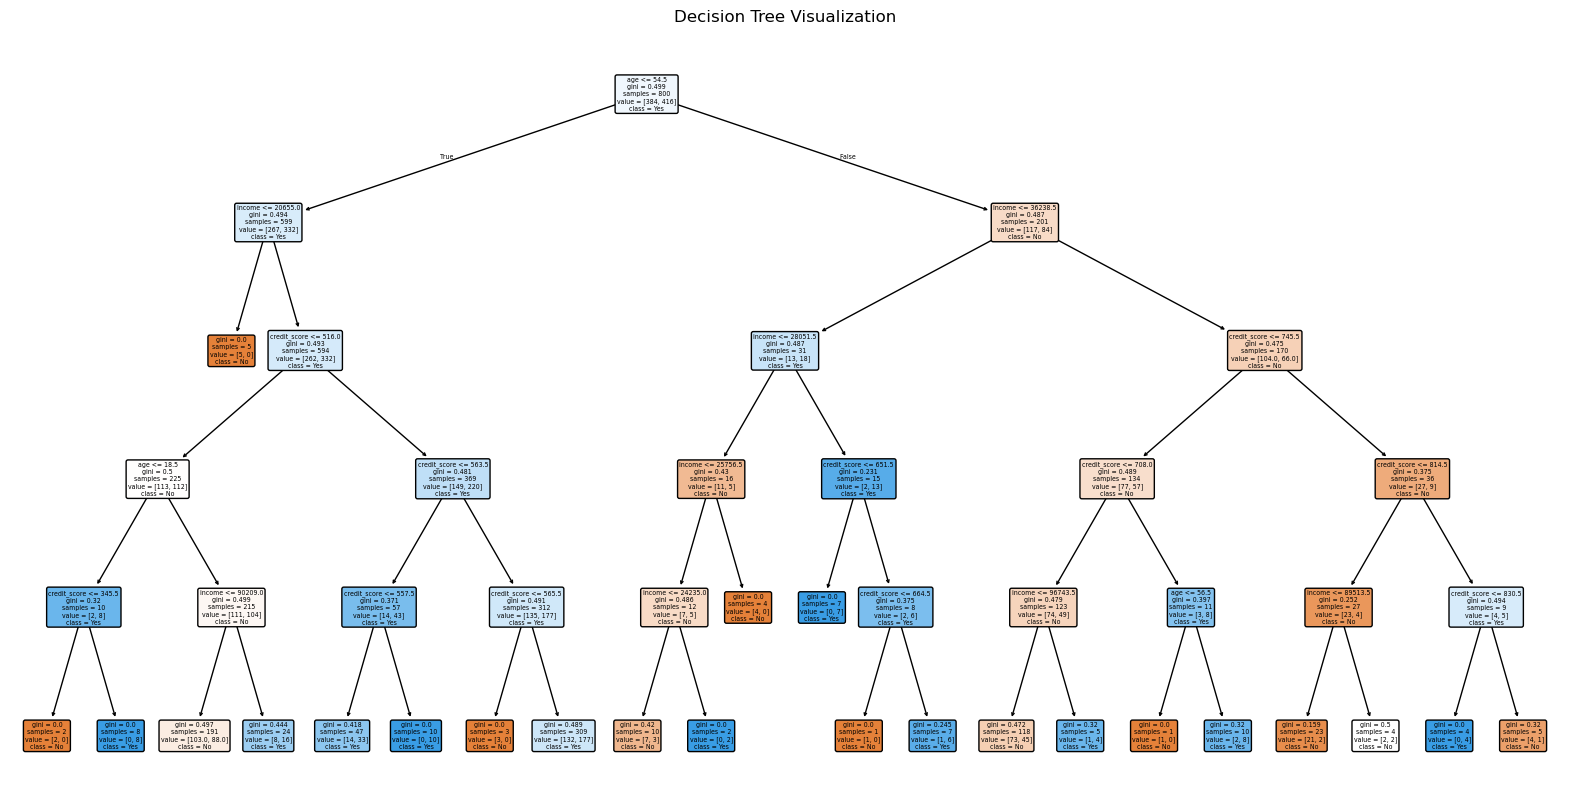

In [8]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [9]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

In [10]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
        feature  importance
2  credit_score    0.476343
1        income    0.347613
0           age    0.176044
